# Introduction

This project provides code for forecasting the price of gold using various time series
forecasting methods. The dataset used for the analysis is the daily price of gold in INR from
1979-01 to 2023-08, with a total of 11640 data points. The Jupyter notebook included in the 
repository contains code for building and evaluating three different time series forecasting 
models, namely Linear Regression Model, Naive Model, and Exponential Smoothing Model. 
The Exponential Smoothing Model performed the best with a MAPE score of 10.884%. The 
predicted gold prices for the period 2023-09 to 2031-04 using the Exponential Smoothing 
Model are also provided in a CSV file named price_prediction_of_Gold_upto_2031.csv. The dataset, code, 
and results can be accessed through the  Github repository provided in the references.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Gold_Prices_daily_1979-2022.csv')

In [3]:
df

,Unnamed: 0,USD,INR
0,01-01-1979,226.0,"1,785.7"
1,02-01-1979,226.8,"1,792.9"
2,03-01-1979,218.6,"1,802.2"
3,04-01-1979,223.2,"1,811.7"
4,05-01-1979,225.5,"1,843.6"
...,...,...,...
11635,07-08-2023,"1,931.7","1,59,902.5"
11636,08-08-2023,"1,926.4","1,59,677.4"
11637,09-08-2023,"1,922.8","1,59,313.1"
11638,10-08-2023,"1,920.9","1,58,868.0"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11640 entries, 0 to 11639
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11640 non-null  object
 1   USD         11640 non-null  object
 2   INR         11640 non-null  object
dtypes: object(3)
memory usage: 272.9+ KB


In [5]:
df['INR'] = df['INR'].str.replace(',', '').astype(float)
df['USD'] = df['USD'].str.replace(',', '').astype(float)

In [6]:
df

,Unnamed: 0,USD,INR
0,01-01-1979,226.0,1785.7
1,02-01-1979,226.8,1792.9
2,03-01-1979,218.6,1802.2
3,04-01-1979,223.2,1811.7
4,05-01-1979,225.5,1843.6
...,...,...,...
11635,07-08-2023,1931.7,159902.5
11636,08-08-2023,1926.4,159677.4
11637,09-08-2023,1922.8,159313.1
11638,10-08-2023,1920.9,158868.0


In [7]:
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11640 entries, 0 to 11639
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  11640 non-null  datetime64[ns]
 1   USD         11640 non-null  float64       
 2   INR         11640 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 272.9 KB


In [10]:
df

,Unnamed: 0,USD,INR
0,1979-01-01,226.0,1785.7
1,1979-02-01,226.8,1792.9
2,1979-03-01,218.6,1802.2
3,1979-04-01,223.2,1811.7
4,1979-05-01,225.5,1843.6
...,...,...,...
11635,2023-07-08,1931.7,159902.5
11636,2023-08-08,1926.4,159677.4
11637,2023-09-08,1922.8,159313.1
11638,2023-10-08,1920.9,158868.0


In [14]:
df.set_index('Unnamed: 0', inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11640 entries, 1979-01-01 to 2023-11-08
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   USD     11640 non-null  float64
 1   INR     11640 non-null  float64
dtypes: float64(2)
memory usage: 272.8 KB


In [19]:
df

,USD,INR
Unnamed: 0,,
1979-01-01,226.0,1785.7
1979-02-01,226.8,1792.9
1979-03-01,218.6,1802.2
1979-04-01,223.2,1811.7
1979-05-01,225.5,1843.6
...,...,...
2023-07-08,1931.7,159902.5
2023-08-08,1926.4,159677.4
2023-09-08,1922.8,159313.1


In [26]:
df1 = df['1979-01-01':'2023-08-11'].resample('M').mean()

In [27]:
df1

,USD,INR
Unnamed: 0,,
1979-01-31,252.866667,2054.309524
1979-02-28,263.676190,2149.990476
1979-03-31,264.309091,2150.981818
1979-04-30,263.405000,2156.470000
1979-05-31,280.145833,2278.483333
...,...,...
2023-04-30,1985.482353,162809.917647
2023-05-31,1963.566667,162016.688889
2023-06-30,1924.265000,157967.460000


In [28]:
df1['USD'] = df1['USD'] / 31.1034768
df1['INR'] = df1['INR'] / 31.1034768

In [29]:
df1

,USD,INR
Unnamed: 0,,
1979-01-31,8.129852,66.047585
1979-02-28,8.477386,69.123799
1979-03-31,8.497735,69.155671
1979-04-30,8.468667,69.332120
1979-05-31,9.006898,73.254940
...,...,...
2023-04-30,63.834740,5234.460401
2023-05-31,63.130134,5208.957504
2023-06-30,61.866556,5078.771773


# Plot the gold prices over time

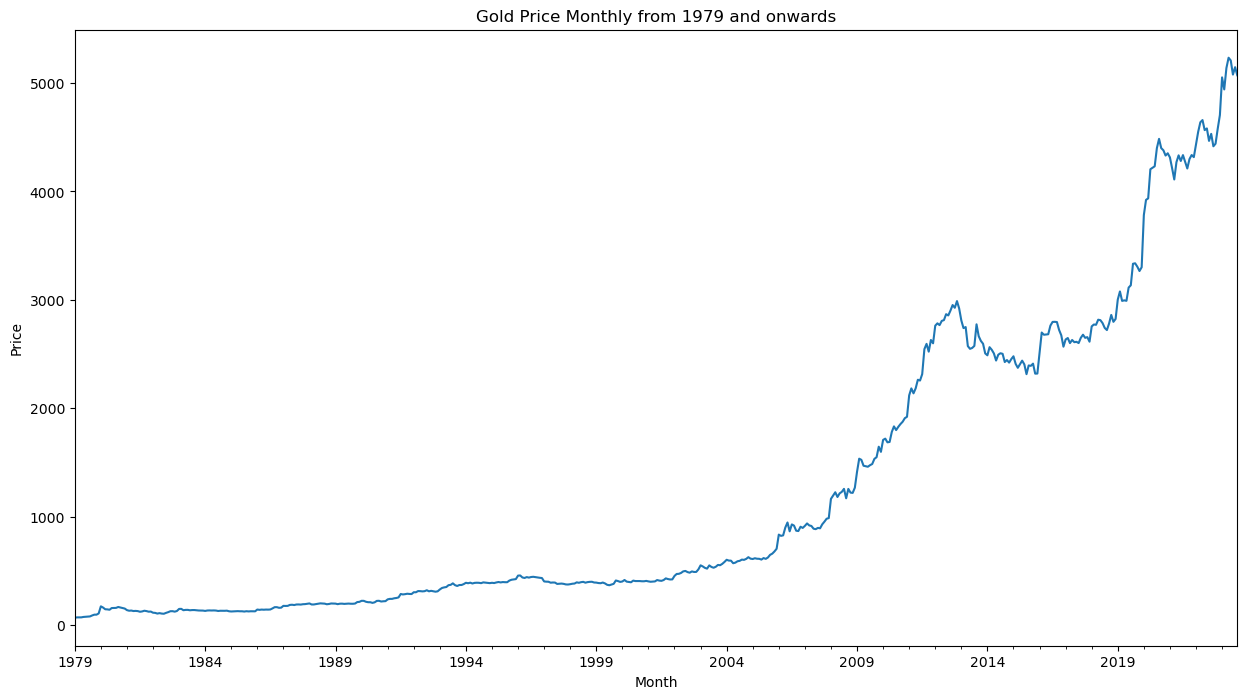

In [30]:
plt.figure(figsize=(20,8))
df1['INR'].plot(figsize=(15,8))
plt.title('Gold Price Monthly from 1979 and onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

# Create a boxplot of the gold prices by year

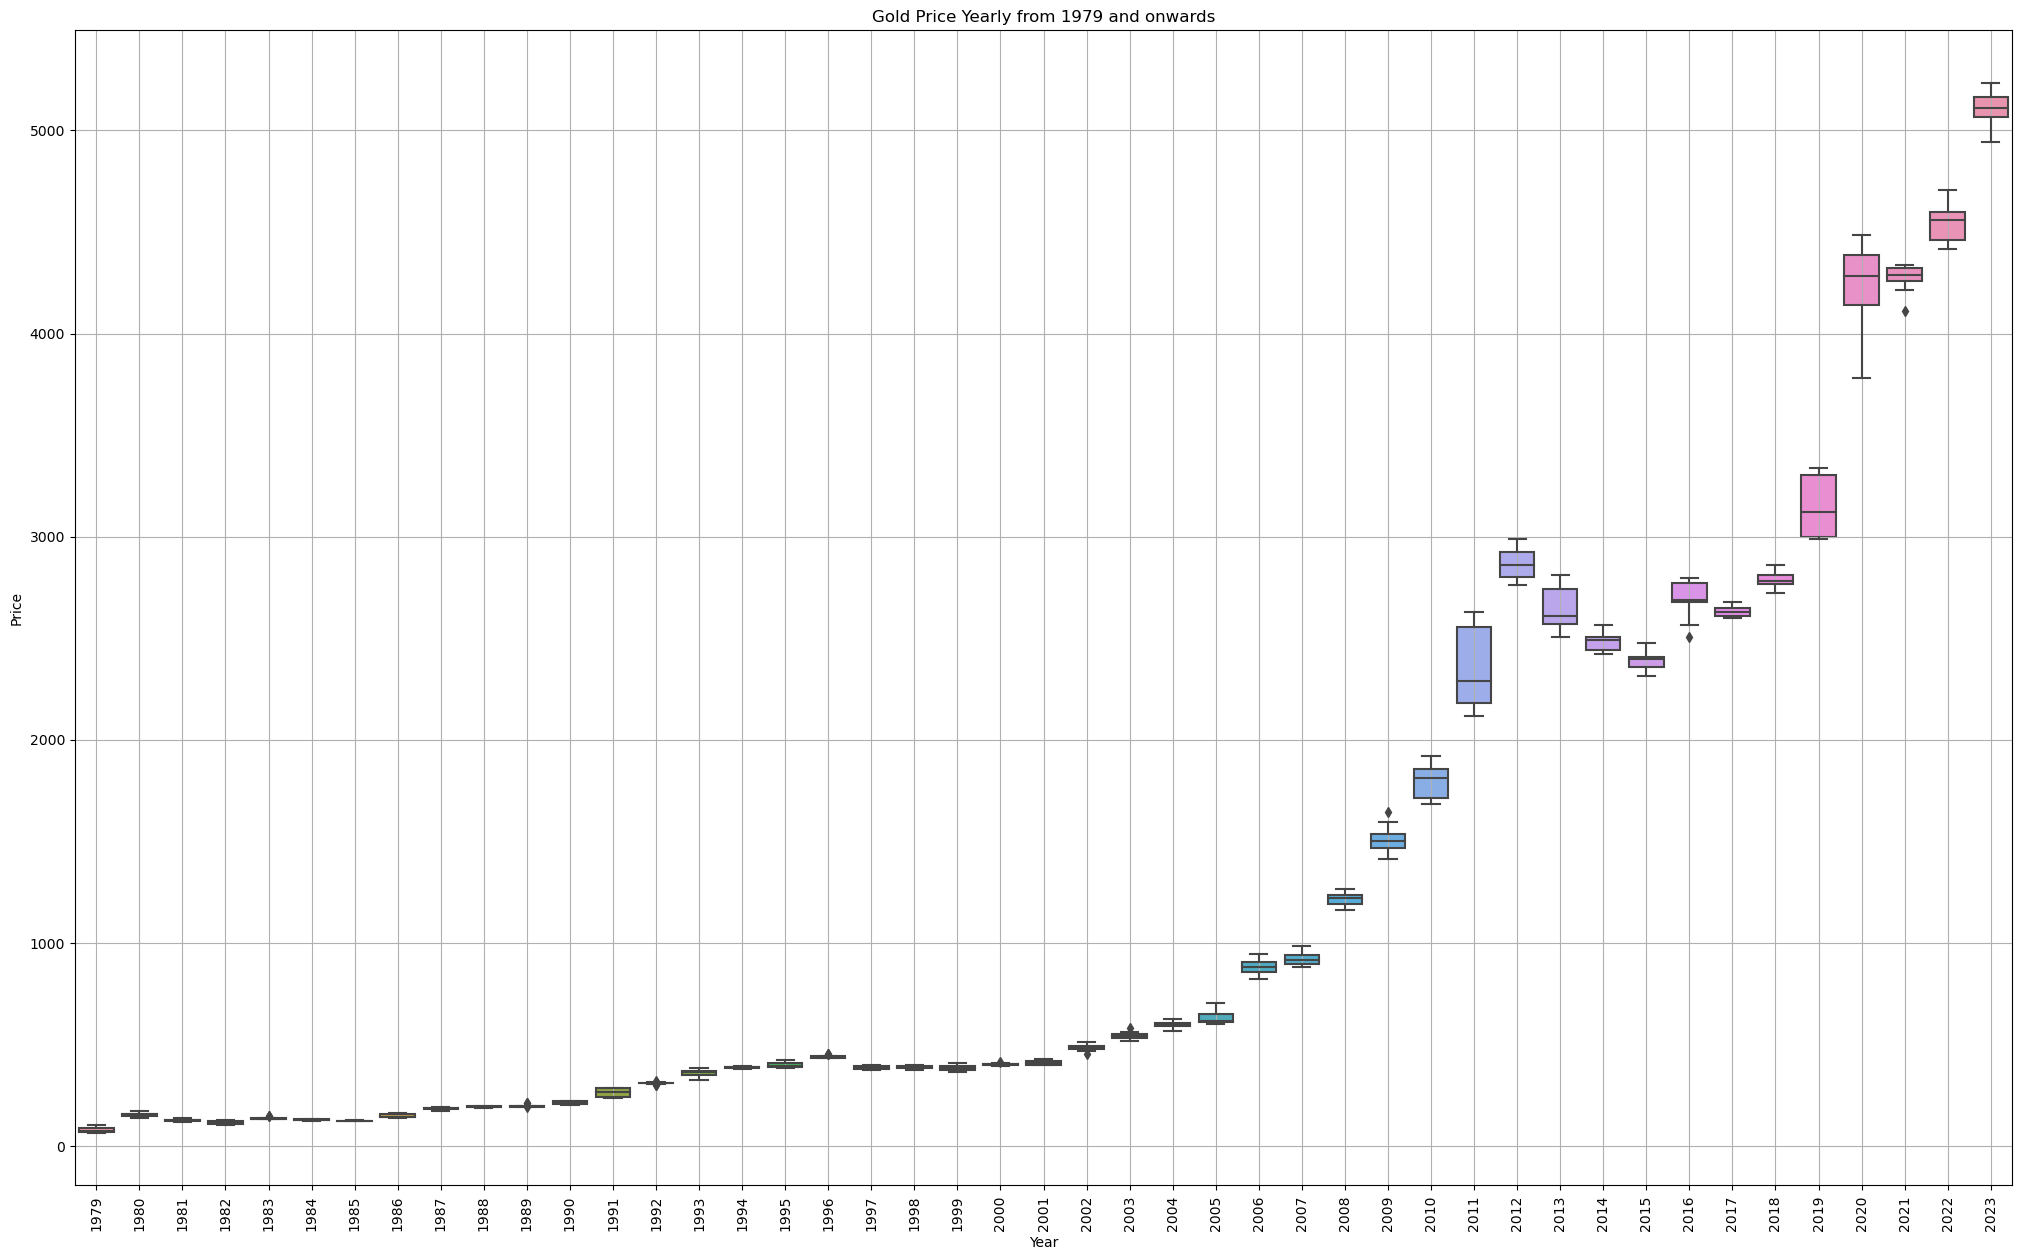

In [31]:
plt.figure(figsize=(25,15))
sns.boxplot(x=df1.index.year, y=df1['INR'])
plt.title('Gold Price Yearly from 1979 and onwards')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [32]:
df1.describe()

,USD,INR
count,536.000000,536.000000
mean,24.002761,1231.110195
std,16.740534,1363.990471
min,8.129852,66.047585
25%,11.537121,210.138858
50%,13.780116,436.937027
75%,39.798382,2421.959843
max,63.834740,5234.460401


###  Plot the gold prices by month

In [33]:
from statsmodels.graphics.tsaplots import month_plot

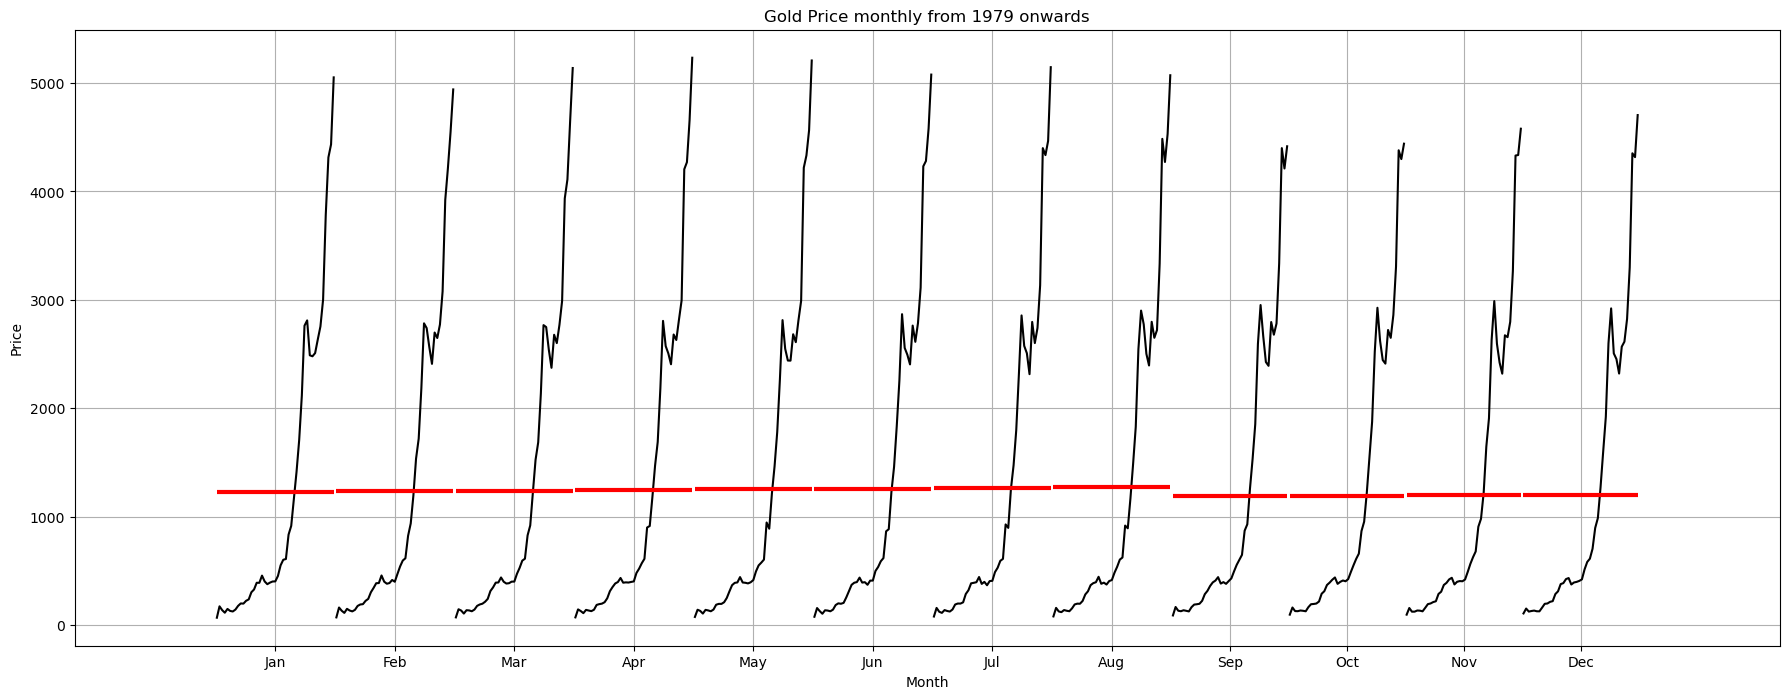

In [34]:
fig, ax = plt.subplots(figsize=(22,8))
month_plot(df1['INR'], ylabel='Gold Price', ax=ax)
plt.title('Gold Price monthly from 1979 onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid()
plt.show()

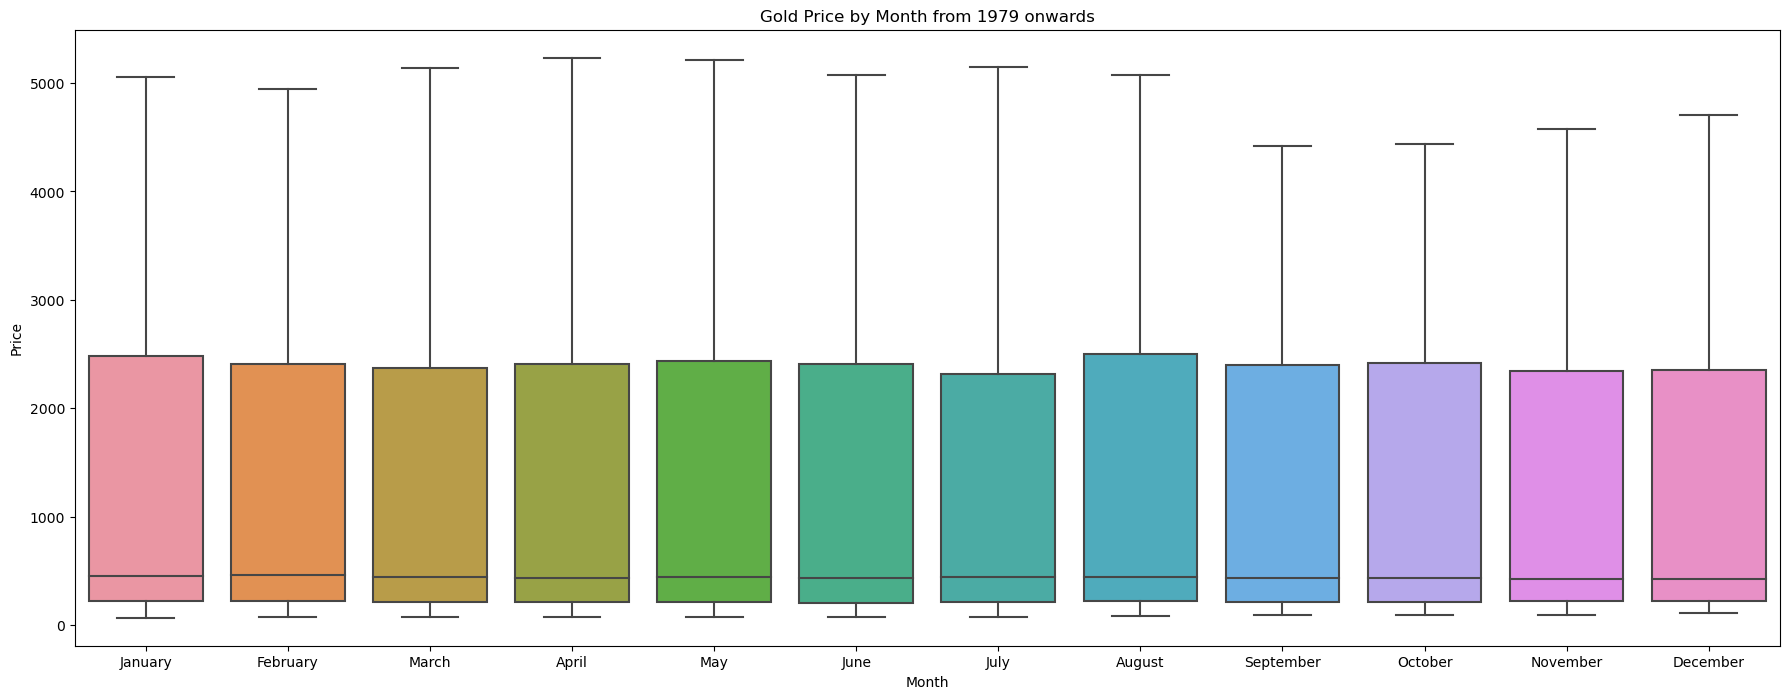

In [35]:
# Create a boxplot of the gold prices by month
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df1.index.month_name(), y=df1['INR'], ax=ax)
plt.title('Gold Price by Month from 1979 onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

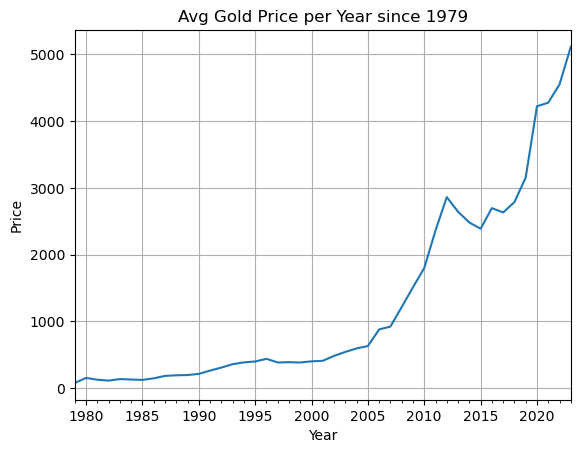

In [36]:
# Create yearly, quarterly, and decade summaries of the data
df_yearly_sum = df1['INR'].resample('A').mean()
df_yearly_sum.plot()
plt.title('Avg Gold Price per Year since 1979')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()

Text(0, 0.5, 'Price')

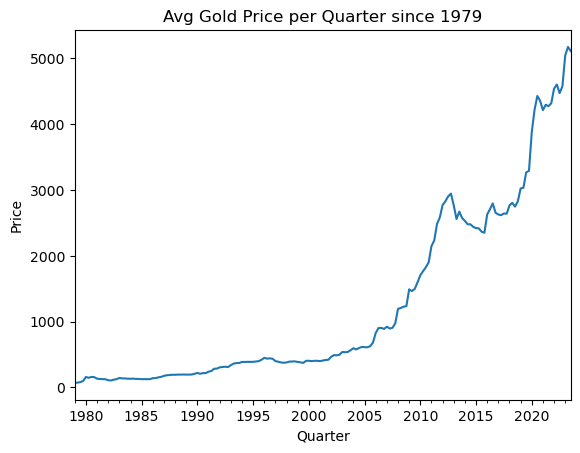

In [37]:
df_quarterly_sum = df1['INR'].resample('Q').mean()
df_quarterly_sum.plot()
plt.title('Avg Gold Price per Quarter since 1979')
plt.xlabel('Quarter')
plt.ylabel('Price')

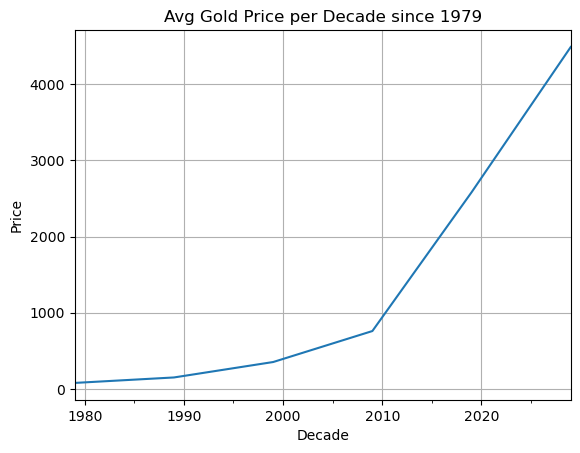

In [38]:
plt.grid()
df_decade_sum = df1['INR'].resample('10Y').mean()
df_decade_sum.plot()
plt.title('Avg Gold Price per Decade since 1979')
plt.xlabel('Decade')
plt.ylabel('Price')
plt.grid()

In [39]:
print("Summary statistics of gold prices:\n", df1.describe())

Summary statistics of gold prices:
               USD          INR
count  536.000000   536.000000
mean    24.002761  1231.110195
std     16.740534  1363.990471
min      8.129852    66.047585
25%     11.537121   210.138858
50%     13.780116   436.937027
75%     39.798382  2421.959843
max     63.834740  5234.460401


In [40]:
## Calculate the mean, standard deviation, and coefficient of variation(CV) for the data by year
df_1 = df1.groupby(df1.index.year).mean().rename(columns={'INR':'Mean'})
df_1 = df_1.merge(df1.groupby(df1.index.year).std().rename(columns={'INR':'Std'}), left_index=True, right_index=True)
df_1['Cov_pct'] = ((df_1['Std'] / df_1['Mean']) * 100).round(2)

The first few rows of the coefficient of variation data:
                USD_x        Mean     USD_y        Std  Cov_pct
Unnamed: 0                                                     
1979         9.849945   79.843284  1.549950  12.561503    15.73
1980        19.687220  154.886130  1.229725   9.260083     5.98
1981        14.768770  127.536690  0.944564   4.546941     3.57
1982        12.080266  114.467810  0.859030   9.248353     8.08
1983        13.615712  137.322987  0.635040   5.224860     3.80


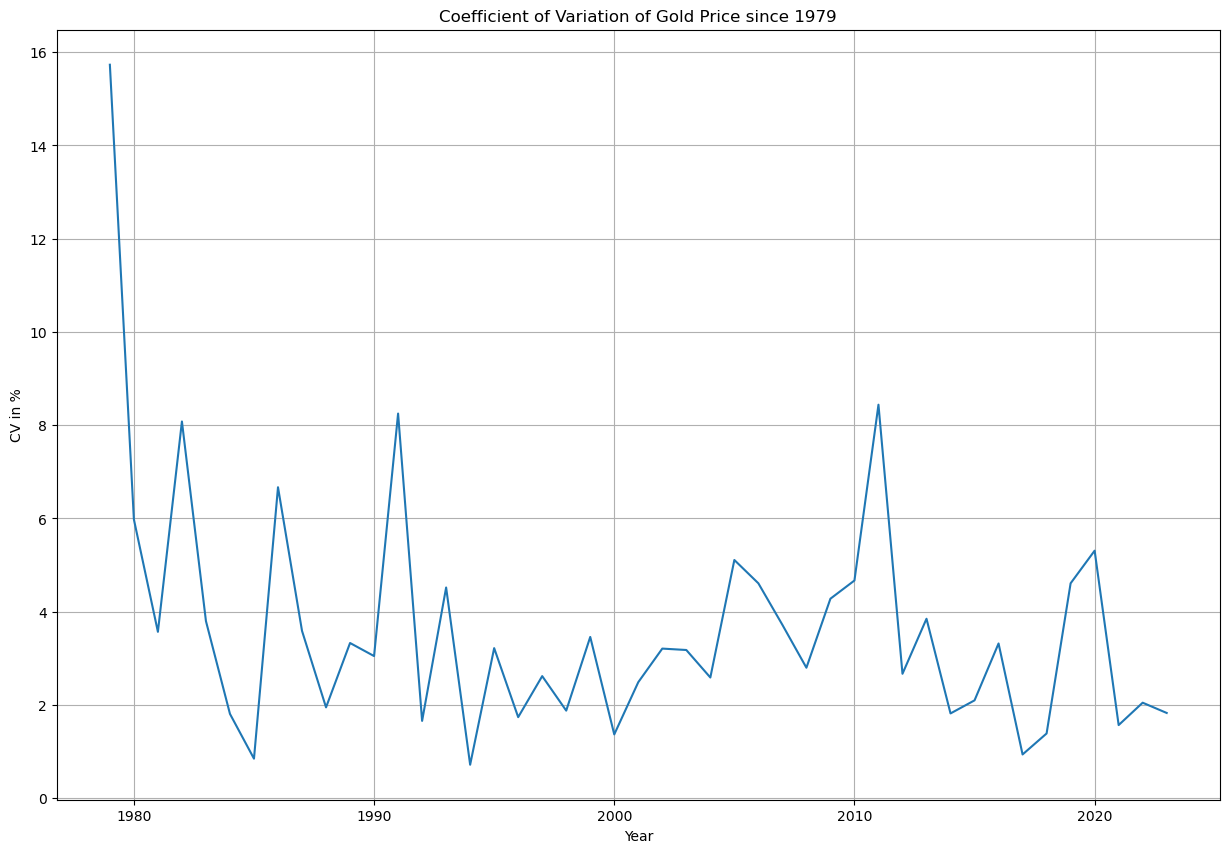

In [41]:
# Plot the CV over time
fig, ax = plt.subplots(figsize=(15, 10))
df_1['Cov_pct'].plot()
plt.title('Coefficient of Variation of Gold Price since 1979')
plt.xlabel('Year')
plt.ylabel('CV in %')
plt.grid()
# Display the first few rows of the data
print('The first few rows of the coefficient of variation data:')
print(df_1.head())

### Split the dataset into training and testing sets based on a cutoff year

In [42]:
train = df1[df1.index.year <= 2015]
test = df1[df1.index.year > 2015]

In [43]:
# Check the shape of the training and testing sets
print("Training set shape:", train.shape)

Training set shape: (444, 2)


In [44]:
print("Testing set shape:", test.shape)

Testing set shape: (92, 2)


In [45]:
# Checking for bias in the split
train_pct = len(train) / len(df) * 100
test_pct = len(test) / len(df) * 100
print("Percentage of data in training set:", round(train_pct, 2), '%')
print("Percentage of data in testing set:", round(test_pct, 2), '%')

Percentage of data in training set: 3.81 %
Percentage of data in testing set: 0.79 %


### It is not necessarily biased to split the data this way. 
### However, it may depend on the specific problem and the goals of the 
analysis. 
### It is always a good practice to carefully consider the split and to 
test different split ratios to evaluate their impact on the model 
performance.

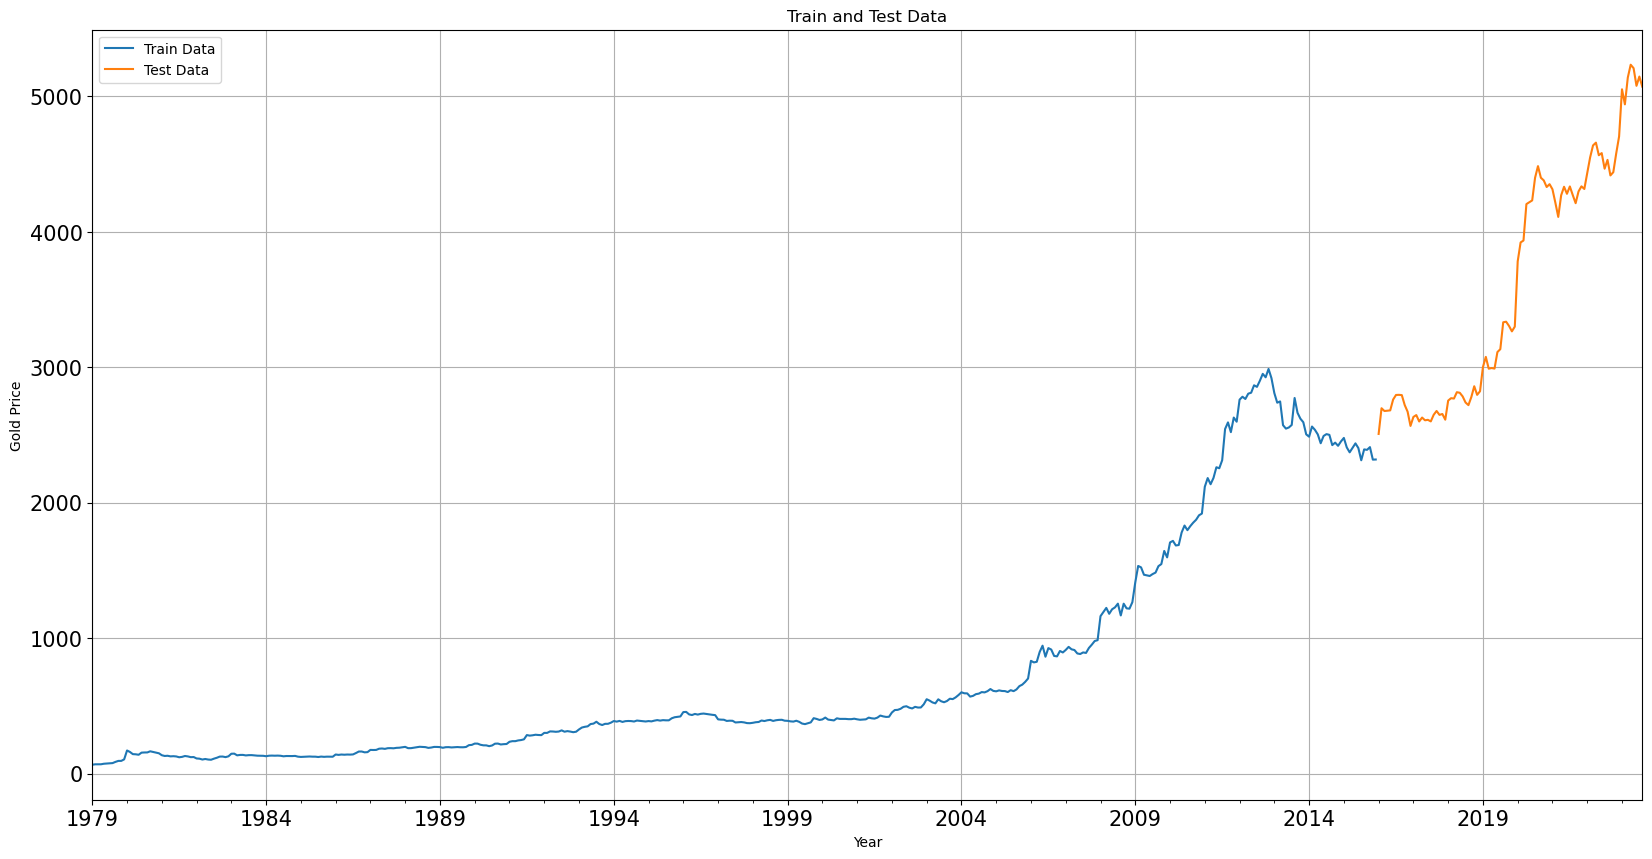

In [46]:
# Plot train and test data
train['INR'].plot(figsize=(20,10), fontsize=15)
test['INR'].plot(figsize=(20,10), fontsize=15)
plt.grid()
plt.legend(['Train Data', 'Test Data'])
plt.title('Train and Test Data')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.show()

In [47]:
# Create time series for train and test data
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
print(f"Train time series length: {len(train_time)}")
print(f"Test time series length: {len(test_time)}")

Train time series length: 444
Test time series length: 92


In [48]:
# Add time series as a feature to train and test data
LR_train = train.copy()
LR_test = test.copy()
LR_train['time'] = train_time
LR_test['time'] = test_time

In [49]:
# Train a linear regression model on the train data using time as the independent variable
lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train['INR'].values)

LinearRegression()

In [50]:
#Use the trained model to make predictions on the test data
test_predictions_model1 = lr.predict(LR_test[['time']])
LR_test['forecast'] = test_predictions_model1

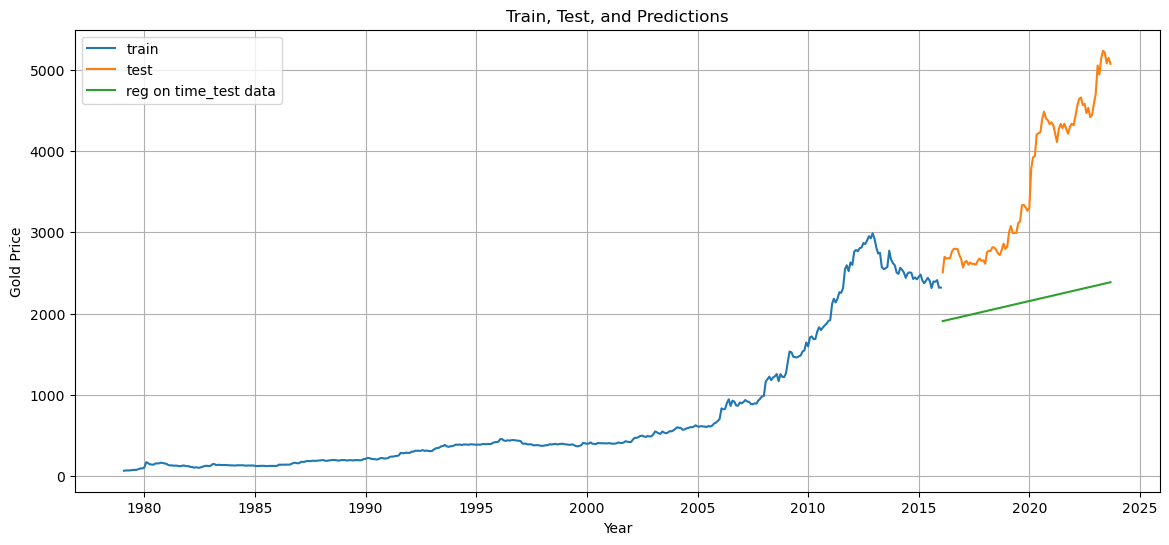

In [51]:
# Plot the train data, test data, and predictions made by the linear regression model
plt.figure(figsize=(14,6))
plt.plot(train['INR'],label='train')
plt.plot(test['INR'], label='test')
plt.plot(LR_test['forecast'], label='reg on time_test data')
plt.legend(loc='best')
plt.grid()
plt.title('Train, Test, and Predictions')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.show()

In [52]:
def mape(y_true, y_pred):
 """Calculate mean absolute percentage error (MAPE)"""
 y_true, y_pred = np.array(y_true), np.array(y_pred)
 return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [53]:
# Calculate MAPE for the linear regression model
mape_model1_test = mape(test['INR'].values, test_predictions_model1)
print(f"MAPE for Regression on Time model on test data: {mape_model1_test:.3f}%")

MAPE for Regression on Time model on test data: 37.942%


In [54]:
# Create results dataframe to store MAPE values for different models
results = pd.DataFrame({'Test MAPE (%)': [mape_model1_test]}, index=['Regression on Time'])
results

,Test MAPE (%)
Regression on Time,37.942236


In [55]:
#Create naive model
naive_train = train.copy()
naive_test = test.copy()
naive_test['naive'] = np.asarray(train['INR']) [len(np.asarray(train['INR'])) - 1]
naive_test['naive'].head()

Unnamed: 0
2016-01-31    2319.646845
2016-02-29    2319.646845
2016-03-31    2319.646845
2016-04-30    2319.646845
2016-05-31    2319.646845
Freq: M, Name: naive, dtype: float64

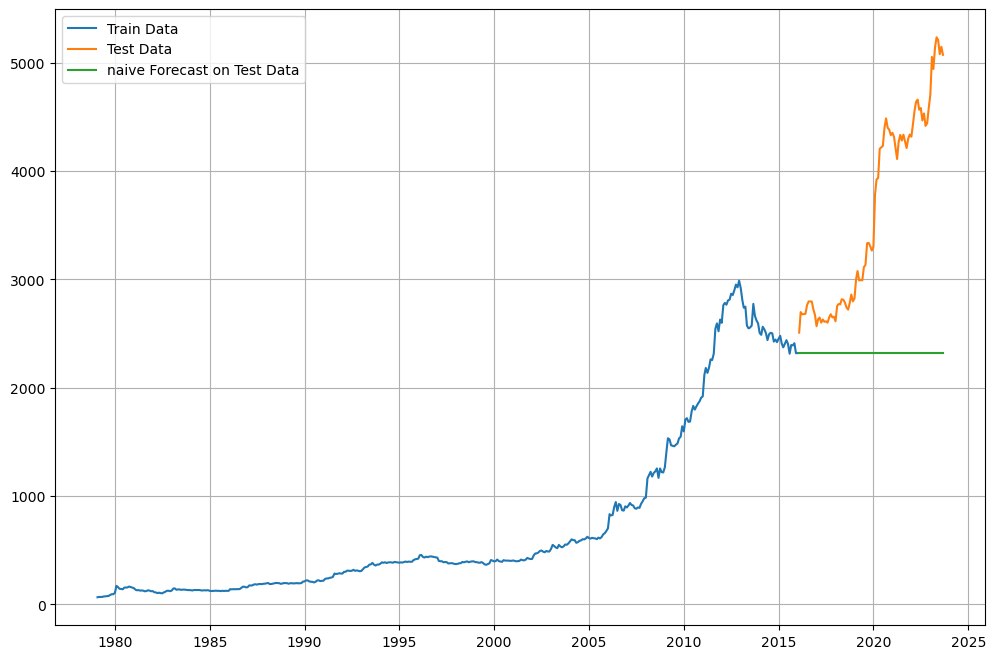

In [56]:
# Plot the train, test, and naive forecast on test data
plt.figure(figsize=(12,8))
plt.plot(naive_train['INR'], label='Train Data')
plt.plot(test['INR'], label='Test Data')
plt.plot(naive_test['naive'], label='naive Forecast on Test Data')
plt.legend(loc='best')
plt.grid()

In [57]:
# Calculate MAPE for naive forecast model
mape_model2_test = mape(test['INR'].values, naive_test['naive'].values)
print('MAPE for naive Forecast model is %3.3f%%' % mape_model2_test)

MAPE for naive Forecast model is 31.925%


In [58]:
# Update the dataframe with the MAPE result for the naive forecast model
resultsDf_2 = pd.DataFrame({'Test MAPE (%)': [mape_model2_test]}, 
index=['naiveForecast'])
results = pd.concat([results,resultsDf_2])

In [59]:
# Display the dataframe with the MAPE results for both models
results

,Test MAPE (%)
Regression on Time,37.942236
naiveForecast,31.924695


In [60]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [61]:
# Perform exponential smoothing with additive trend and additive seasonality
final_model = ExponentialSmoothing(df1['INR'],trend='additive', seasonal='additive').fit(smoothing_level=0.4, smoothing_trend=0.3, smoothing_seasonal=0.6)

In [62]:
# Calculate mean absolute percentage error (MAPE) of the fitted values
mape_final_model = mape(df1['INR'].values, final_model.fittedvalues)
print(f'MAPE of final model: %.3f%%' % mape_final_model)

MAPE of final model: 10.884%


In [63]:
# Generate forecast using the final model
prediction = final_model.forecast(steps=len(test))

In [64]:
# Create a dataframe to store the prediction and confidence intervals
pred_df = pd.DataFrame({'lower_CI': prediction - 1.96 * np.std(final_model.resid, ddof=1),'prediction': prediction,'upper_CI': prediction + 1.96 * np.std(final_model.resid, ddof=1)})

In [65]:
# Export the predictions into a csv file.
pred_df.to_csv('gold_price_predictions.csv', index=True, index_label='Month')

In [66]:
print('Prediction and confidence intervals:')
pred_df

Prediction and confidence intervals:


,lower_CI,prediction,upper_CI
2023-09-30,4912.899438,5082.191865,5251.484293
2023-10-31,4909.713361,5079.005789,5248.298217
2023-11-30,4939.577894,5108.870322,5278.162749
2023-12-31,4895.604992,5064.897419,5234.189847
2024-01-31,5007.479123,5176.771550,5346.063978
...,...,...,...
2030-12-31,4299.043528,4468.335956,4637.628384
2031-01-31,4410.917659,4580.210087,4749.502514
2031-02-28,4202.685008,4371.977435,4541.269863
2031-03-31,4281.377103,4450.669530,4619.961958


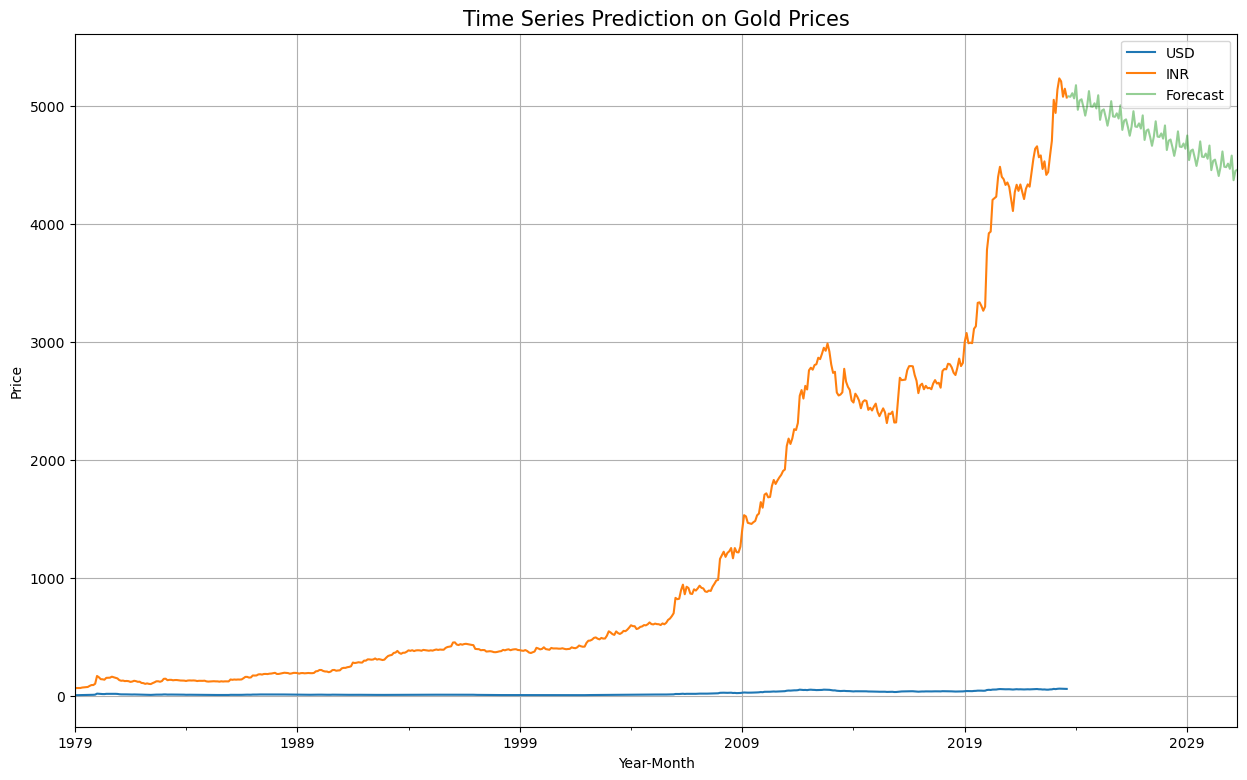

In [70]:
# Plot actual and predicted values with confidence intervals
axis = df1.plot(label='Actual', figsize=(15,9))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], 
pred_df['upper_CI'], color='m', alpha=0.5)
axis.set_xlabel('Year-Month')
axis.set_ylabel('Price')
plt.title('Time Series Prediction on Gold Prices',fontsize=15)
plt.legend(loc='best')
plt.grid()
plt.show()

In [71]:
# Save plot as png
plt.savefig('price_prediction_of_Gold_upto_2031.png')

<Figure size 640x480 with 0 Axes>